<a href="https://colab.research.google.com/github/victorious07/Regression_Capstone_Project/blob/main/Seoul_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


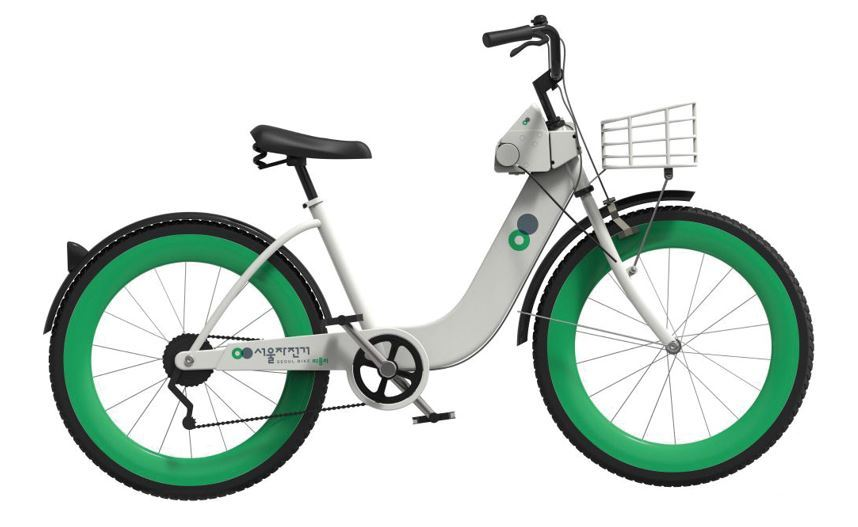


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
sns.set_style('darkgrid')

## **Introduction to data**

In [2]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
file_path ='/content/drive/MyDrive/Regression_Capstone_Project/'
seoul_bike_df = pd.read_csv(file_path + 'SeoulBikeData.csv',encoding='cp1252')

In [4]:
seoul_bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
seoul_bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
seoul_bike_df.rename({"Temperature(°C)": "Temperature",  
                      "Functioning Day":"Functioning_Day",
           "Humidity(%)": "Humidity",  
           "Wind speed (m/s)": "Wind_speed",
           "Visibility (10m)": "Visibility",
           "Dew point temperature(°C)": "Dew_point_temperature",
           "Solar Radiation (MJ/m2)": "Solar_Radiation",
           "Snowfall (cm)": "Snowfall",
           "Rainfall(mm)": "Rainfall",
           "Rented Bike Count": "Rented_Bike_Count"},  
          axis = "columns", inplace = True) 


**Shape**

In [7]:
seoul_bike_df.shape

(8760, 14)

**Info**

In [8]:
seoul_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [9]:
#checking Duplicate values
seoul_bike_df.duplicated().sum()

0

**Missingno library offers a very nice way to visualize the distribution of NaN values.**

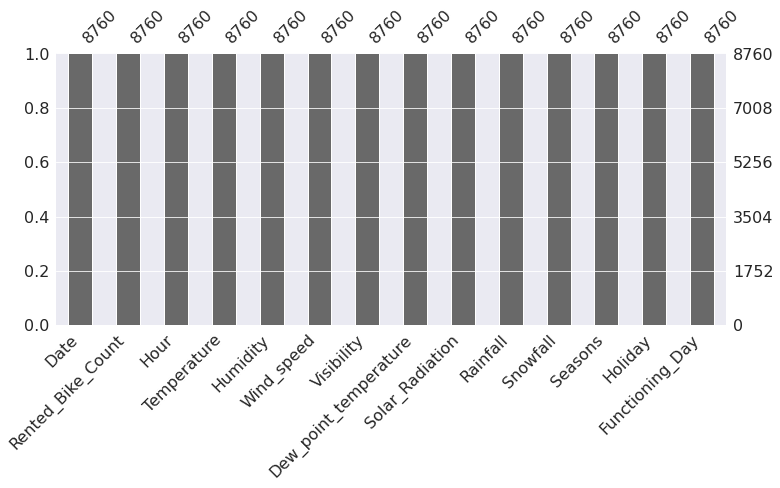

In [10]:
import missingno as msno
msno.bar(seoul_bike_df,figsize=(12,5))
#msno.matrix(seoul_bike_df,figsize=(12,5))

In [11]:
#counting the null value across the columns
seoul_bike_df.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [12]:
seoul_bike_df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [13]:
#unique seasons
seoul_bike_df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [14]:
#unique Holiday
seoul_bike_df.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [15]:
#unique hour
seoul_bike_df.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [16]:
# plt.title("Hours")
# seoul_bike_df['Hour'].value_counts().plot(kind='pie',figsize=(8,5))
# plt.show()

In [17]:
seoul_bike_df.Functioning_Day.unique()

array(['Yes', 'No'], dtype=object)

In [18]:
#seoul_bike_df.loc[seoul_bike_df['Functioning_Day'] == 'No',['Functioning_Day','Rented_Bike_Count']]
seoul_bike_df.groupby('Functioning_Day')['Rented_Bike_Count'].sum().reset_index()

,Functioning_Day,Rented_Bike_Count
0,No,0
1,Yes,6172314


In [19]:
seoul_bike_df = seoul_bike_df[seoul_bike_df['Functioning_Day'] == 'Yes']
seoul_bike_df.drop('Functioning_Day', axis=1, inplace=True)

In [20]:
seoul_bike_df.shape

(8465, 13)

## **Dependent variable**

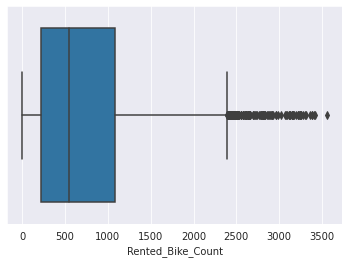

In [21]:
sns.boxplot(seoul_bike_df['Rented_Bike_Count'])

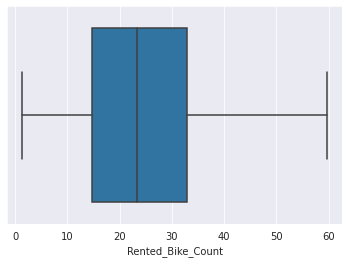

In [22]:
sns.boxplot(np.sqrt(seoul_bike_df['Rented_Bike_Count']))

**Observations:**<br>
After applying Square root to the Rented Bike Count column, we found that there is no outliers present.


## **Catagorical Variables**

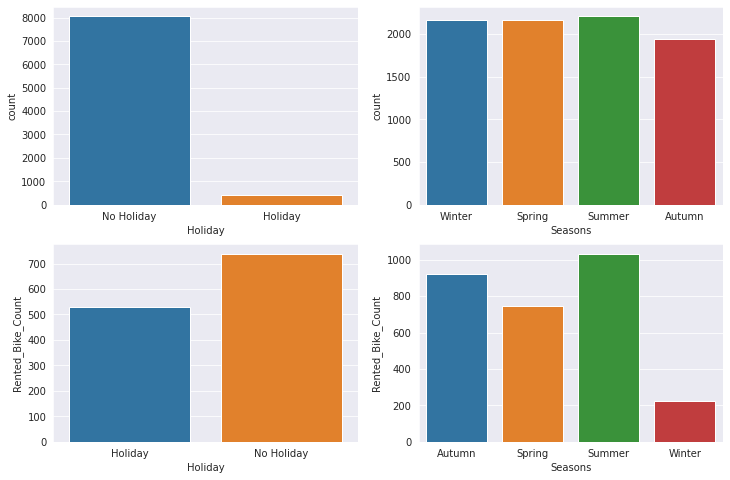

In [23]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
ax1 = plt.subplot(2,2,1)
sns.countplot(seoul_bike_df['Holiday'])
ax1 = plt.subplot(2,2,2)
sns.countplot(seoul_bike_df['Seasons'])

# Bike rented in Seasons and holidays
holiday_df = seoul_bike_df.groupby('Holiday')['Rented_Bike_Count'].mean().reset_index()
seasons_df = seoul_bike_df.groupby('Seasons')['Rented_Bike_Count'].mean().reset_index()

ax1 = plt.subplot(2,2,3)
sns.barplot(x = holiday_df['Holiday'],y = holiday_df['Rented_Bike_Count'])

ax1 = plt.subplot(2,2,4)
sns.barplot(x = seasons_df['Seasons'],y = seasons_df['Rented_Bike_Count'])

**Observations:**<br>
From the above data, we observe that large number of bikes are being rented when there is a working day/No Holiday and more often in summer season. Even in general also, bikes are being rented more in the working day itself regardless of the seasons.

**Label Encoding**

In [24]:
categorical_variables = ['Holiday','Seasons']

In [25]:
encode=LabelEncoder()
seoul_bike_df[categorical_variables]=seoul_bike_df[categorical_variables].apply(lambda X: encode.fit_transform(X))

In [26]:
seoul_bike_df.head(2)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1
